# Numpy.Random

## Assignment Details

Problem statement
The following assignment concerns the numpy.random package in Python. You are
required to create a Jupyter notebook explaining the use of the package, including
detailed explanations of at least five of the distributions provided for in the package.
There are four distinct tasks to be carried out in your Jupyter notebook.
1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions.
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.

In [2]:
import numpy as np
np.__version__

'1.19.2'

# What is Numpy?

Numpy is a Python package that is focused around mathemetical functions and related use cases in Python. It introduces  N-Dimensional Arrays (ndarray) to Python, which can store large amounts of data of the same data type (e.g. string, integer, float), and allows the data to be stored in various "shapes" (i.e. different dimensions). Alongside the ndarray data type, NumPy is heralded for its speed and ease of use, especially across larger and larger data sets.[1] 

Numpy is not the only package that brings arrays to Python, nor was it even the first, as it replaced Numarray and Numeric, however it is the most widely adopted of these packages. The package is so popular, it now forms the foundation of other popular data science packages and datatypes, such as the Pandas DataFrame[2], and has thus further cemented itself into the Python data science ecosystem.

### Regarding Numpy Version

Throughout this assignment, I will be referring to the syntax used in the current stable version of Numpy(v1.19). This latest version of Numpy brought with it a range of changes, most notably in the algorithm used to generated pseudorandom numbers (covered in detail below), and in the syntax used for accessing the various functions in the Numpy.Random package.

## Arrays

Arrays are a list like data type that can only contain one data type within it. This means that a list of mixed data types, e.g. [14, 4.21, 'Hello'] could not be an array. Numpy also makes it easier to map multiple arrays together to create n-dimensional arrays, for example the X and Y variables of observations, and this opens the door for easier analysis and plotting. It's therefore very common for a dataset to be turned into a Numpy array before plotting, either directly via NumPy specific functions, or indirectly via other packages such as Pandas (which is built on top of NumPy).

# Numpy.Random

Another major component of Numpy, and the main topic of this Jupyter Notebook, is its ability to generate psuedorandom data for a wide range of use cases. While Numpy is not the only pseudorandom number generator available in Python, it is one of the most popular for scientific use cases, as it can utilized the ndarray data type to generate the numbers more quickly than other packages. For example, the random.random package in the Python Standard Library can only generate one number at a time, and so creating a large dataset via this package is many times slower than it would be when using Numpy.Random[3]. 

## Common Pseudorandom Use Cases

### Generating a dummy data set

There are times when the user cannot use real world data for their study and analysis, perhaps due to that data not yet being collected or available to them, or perhaps the user simply needs to develop and test an analysis on a generic set of data before going into the real world. In these situations, these users can turn to Numpy.Random to create a dummy set of pseudorandom data, and can even specify the distribution that they wish to work from (e.g. Normal distribution, or Exponential distribution). By mirroring the distribution that the user expects to see in the real world, they can confidently develop their algorithms and analysis techniques ahead of time, so that once the real world data is collected it can replace the dummy data set. Similarly if a user is already analysis an existing data set and needs to compare it to known distributions, they can generate such a distribution within their paramters quickly and easy, and then the two data sets via summary statistics or plotting.

Likewise students and teachers can utilise these dummy data sets for the purposes of education, as it only takes one line of code to generate a dummy data set of thousands of pseudorandom observations. This means that users are not restricted by the datasets they have access to, and can create any data set to meet their educational needs. 

### Selecting samples or permutations from an existing dataset

While many of the functions in Numpy.Random are concentrated on generating pseudorandom integers or floats, there are also three functions deisgned to affect existing datasets; numpy.random.Generator.choice[4], numpy.random.Generator.shuffle[5] and numpy.random.Generator.permutation[6]. 
* Choice will select a user determined amount of data points from a given ndarray and return them into a new array. This allows the user to analyse or determine descriptive statistics from the random sample, rather than the population as a whole. This can be useful for methodoligies such as bootstrapping, whereby a large number of random samples are taken from a population in order to simulate a larger collection of data[7].
* Shuffle and Permutation will change the order of the exist ndarray (either in place via Shuffle, or as a new object via Permutation), and thus give the ndarray a pseudorandom order for further analysis.

### Generating keys for software and security

Another crucial use case for pseudorandom numbers is to create secret keys and such for software development. In such cases, it is critical that an outside observer cannot work out the sequence of numbers, as that could comprimse the security of the software. It is in this area that we've seen recent changes to the pseudorandom number generator used by Numpy.Random, as it's moved from the Mersenne Twiser (MT19937) algorithm to more recent PCG-XSL-RR 128/64 algorithm[8][9].

## What are Psuerandom number generators?

Pseudorandom number generators are algorithms that generate numbers that appear random. As suggested by the name, these numbers are not truly random, but are intended to appear as close to random as possible. It is impossible for a computer to generate truly random numbers, as computers are fully deterministic. This means that when they are given the same input and the same algorithm, they will provide the same output[10]. In the case of pseuorandom number generators, the initial input is called the "seed", and this will be the first value put into the algorithm in order to generate the pseudorandom sequence.

As these sequences cannot be truly random, it is therefore crucial that pseudorandom number generators appear as random as possible so that their patterns, and especially the initial seed value, cannot be easily detected. As a result of this, the research environment for creating new, and testing existing, pseudorandom number generators is an important one for modern computing. Since 2007, the TestU01 library[11] has set the standard for how to test pseudorandom number generators, and it is the results of this library that has meant Numpy.Random adopting a new algorithm recently. 

### Why move from Mersenne Twister (MT19937)  to Permuted Congruential Generator (PCG64)

Up until Numpy v1.19, the random functions in Numpy were utilising the Mersenne Twister (MT19937) to generate its pseudorandom number sequences. However, as highlighted in the paper "TestU01: A C Library for Empirical Testing of
Random Number Generators"[11], MT19937 (and other algorithms) actually performed quite poorly on statistical tests. This meant that there was a higher amount of predictability to the pseudorandom number sequences generated by this algorithm, and therefore there was the potential for someone to work out what the seed was, or what the next sequence would be. This has dire consequences for areas such as security, as knowing the sequence can compromise the software involved. 

Meanwhile, MT19937 was also found to be slower than some of the best available algorithms, as highlighted in the below graph from "PCG: A Family of Simple Fast Space-Efficient Statistically Good Algorithms for Random Number Generation"[12]

![here](https://screenshot.click/10_59-rnq8v-9kz2a.jpg)

Here we can see that not only are the Mersenne Twister algorithms slower than others (as showned by their low gbit/s speed), they're also highlighted red to show that they are deemed insecure. This insecurity is due to the fact that TestU01's “linear complexity” test was able to spot nonrandom behaviour within 5 seconds. This is contrast to some of the more robust tests in the TestU01 library which can take hours or even days to run. Therefore MT19937 fell down at one of the earliest challenges put to it by TestU01[12].

As a result, Numpy has now adopted the PCG XSL RR 128/64 algorithm, which was first introduced in the above mentioned paper[12]. This algorithm has been found to be a lot more statisically robust than MT19937, while also being faster. This particular PCG64 algorithm makes for a strong all-rounder for Numpy, as summarised by the paper's author - "It should be used when a fast general-purpose generator is needed but enhanced security would also be desirable."[12]

Although Numpy recommend using PCG64, users can still access the MT19937 if they so choose by passing it as an argument to the Generator function. As shown in this example from Numpy's documentation[8]:
```
from numpy.random import Generator, MT19937
rg = Generator(MT19937(12345))
rg.random()
```

## Seeds and pseudorandom numbers

As mentioned before, pseudorandom number generators are called pseudorandom because a computer cannot generate a truly random number or sequence. It is through the use of algorithms like MT19937 and PCG64 that sequences are generated to appear as close to random as possible, and in order for these algorithms to work they need a starting value. This value is known as a "seed", and is the starting point for the algorithm. Were someone to estimate the seed, they could replicate the entire sequence perfectly. This can be dangerous in security use cases, and is the reason why testing these algorithms is so important to computing. However, in other use cases, having a consistent and known seed can be very useful for testing and replicating code and analyses, and for ensuring that others do get the same results, such as in classroom environments.

### How does Numpy.Random determine the "seed"?

When using Numpy.Random the user can either explicitly specify a value to be used as the seed, or allow Numpy to find one to use itself. In the event that no seed is explicitly specified, Numpy will make use of the entropy on the operating system (OS).[13] Entropy is a source of pseudorandom number generation found within operating systems, and the inputs that create entropy are varied, for example the timing of mouse clicks from the user can influence the value of the entropy.[14]

Alternatively, the user can explicitly specify the seed manually. This allows them to ensure that their results are reproducable, and has a number of use cases. For example, if someone is creating plots based on a pseudorandom sample, they may want to keep the data consistent while they tweak the formatting of the plots, thus allowing them to concentrate on one area, without having to react to another. Similarly if the user is looking to fit a machine learning algorithm to this data, and wants to see the impact of changing various parameters, it'll help to keep a consistent data set while they do so. 

Another strong use case for explicitly specifying is for teaching and workshops[15]. The instructor can go through the steps of a given process with students at the same time, and as the students can specify the same seed as the instructor, it means that their results should match exactly. This ensures that any inconsistencies between the student's outputs and the teacher's are a result of other functions or methods that have been performed on that dataset, and not changes in the dataset itself. Were the seed not manually specified, each time the sample is taken it would change, thus increasing the chances that the instructor and the students output will look different as a result of the sample itself. This use case will also be beneficial for colleagues working together, as they too can ensure they are singing from the same hymm sheet, so to speak.


### Seeding in MT19937 Vs PCG64

While the speed and statistical robustness of PCG64 is already a strange case for Numpy to move away from the MT19937 algorithm, there's also benefits in how PCG64 utilises seeds.

MT19937 has a couple of glaring weaknesses with regards to how it utilised seeds. Most notably, the algorithm would struggle to maintain statistical robustness if the seed contained too many 0s, and that two similar seeds would generate very similar sequences of pseudorandom numbers[16]. In contrast, PCG64 takes steps to alter the seeds immediately, with a high chance that two adjacent integer values would immediately be altered to be very far away from each other, and so would produce very different sequences of numbers[16]. This reduces the possibility of user generated seeds being stumbled upon, as unlike the MT19937 seeds, for PCG64 the user would have to specify the exact same seed to get results anywhere close to the initial seed.

### Seeding Syntax

In prior versions of Numpy, the seed would be specified with the following command[17], in which the parameter is the seed value:
```
numpy.random.seed()
```
For example, if I wanted the seed to be 33, I would simply enter:
```
numpy.random.seed(33)
```
However since version Numpy version 1.19 and the change to the PCG64 algorithm, we first first create a random number generator (rng) container, and it's here that we can specify the seed. For example, if we wish to let Numpy use our operating system's entropy to determine the seed, we'd create the rng container with the following line[18]:
```
rng = default_rng()
```
Whereas if we wish to specify a seed, we'd simply add that value as a parameter, for example:
```
default_rng(33)
```
Similarly, if we wish to use the MT19937 algorithm, we'd hae to use the Generator container rather than the default_rng container, and set MT19937 as a parameter. Similary if we wish to specify a seed for MT19937, we could do so by passing it as a parameter to MT19937 as shown previously:

from numpy.random import Generator, MT19937 rg = Generator(MT19937(12345)) rg.random()


### Comparison of specifying a seed Vs utilising entropy.

As described above, expliticly specifying a seed for the pseudorandom number generator ensures that the sequence follows the same pattern each time. Meanwhile if we do set a seed, Numpy will utilise the entropy of the operating system each time the generator is run, and as such the values will change each time.

Let's see a couple of examples.

First, I won't explicitly set a seed. For this, I'll as Numpy.random to generate 10 integers from 0 up to but not including 10. This syntax for which is[19]:
```
rng.integers(start, end, size)
```
Each time we run this code, it will generate a different sequence of 10 integers up to but not including 10 (i.e. 0-9). You can run the code in the below cell by clicking onto the cell and pressing ctrl+enter on your keyboard. Try it a few times, you'll see the sequence changes each time.

In [6]:
import numpy as np
from numpy.random import default_rng
rng = default_rng()
sample = rng.integers(0,10,10)
sample

array([2, 1, 4, 3, 4, 7, 0, 8, 0, 5])

This is perfect if I need a totally different sequence each time, however if I am looking for a consistent set of pseuorandom values, I must explicitly specify a seed. As mentioned above, this is done by adding an integer as a paramter when we create the rng container. For example:
```
default_rng(33)
```
Once again, run the code in the below cell multiple times, and you'll see the output remains the same each and every time:
```
array([8, 4, 3, 5, 8, 9, 2, 2, 5, 5])
```

In [3]:
rng = default_rng(33)
sample = rng.integers(0,10,10)
sample

array([8, 4, 3, 5, 8, 9, 2, 2, 5, 5])

No matter who runs that code, on whichever device, as long as it has the same seed specified (in this case 33), they will get that same sequence of numbers. I can then ensure that my colleagues, classmates or students are using the same dataset as I am. Therefore any inconsistencies in our results will be caused by another element of our analysis, not by changes in the dataset.

I will continue using this seed through the rest of this assignment so that my results are replicable.

# Numpy.Random Generator Functions

With the algorithm discussed, and the seed set, we can now discuss the various functions available via the pseudorandom number generator. These functions come in three distinct types, each with their own use cases; Simple Random Data, Permutations and Distributions.

## Simple Random Data

Simple Random Data, as the name suggests, are a set of functions which will create a random data set or sample for the user. Depending on the users needs, they can either create a sequence of new integers, floats, bytes or generate a random sample from an existing array.  

### Integers

The Integers function (as seen above) generates one or more integers from a uniform distribution. This means that all of the integers within the specified range have the same probability of being selected. This would be similar to rolling a fair die, where there's an equal chance of it landing on any of the faces. Let's take a closer look at the syntax[19]. 
```
Generator.integers(low, high=None, size=None, dtype=np.int64, endpoint=False)
```
Here we can see that the the only required parameter is "low". This is because, if only one paramter is passed, the function will use 0 as the "low" value, and the stated paramter as the "high" value.

For example, these two functions would behave the same.

In [18]:
rng = default_rng(33)
example1 = rng.integers(0, 3)
example2 = rng.integers(3)

print('Example 1:')
print(example1)
print('\nExample 2:')
print(example2)

Example 1:
2

Example 2:
1


Size will determine how many values the user wants returned. If this parameter isn't specified, then only 1 value will be generated, as shown in the two above examples. If the user wants a multidimensional array, they can specify a tuple of values for this parameter. In the below examples, I generate a one dimensional array by passing an integer (3) as the shape. I then generate a 2 dimension array by passing a tuple with two values (3,3), and three dimensional array by passing a tuple of 3 values (3, 3, 3).

In [19]:
rng = default_rng(33)
example3 = rng.integers(0, 3, 3)
example4 = rng.integers(0, 3, (3, 3))
example5 = rng.integers(0, 3, (3, 3, 3))

print('Example 3:')
print(example3)

print('\nExample 4')
print(example4)

print('\nExample 5:')
print(example5)

Example 3:
[2 1 1]

Example 4
[[1 2 2]
 [0 0 1]
 [1 0 1]]

Example 5:
[[[2 2 2]
  [1 1 0]
  [2 1 1]]

 [[0 1 0]
  [0 0 2]
  [1 0 0]]

 [[2 2 0]
  [2 1 0]
  [0 1 2]]]


The dtype paramater allows us to specify which datatype we would like the numbers to be returned as, with dtype=np.int64 as the default. As list of Numpy data types can be found [here](https://numpy.org/doc/stable/user/basics.types.html) although it should be noted that the integers function will not allow for floats, as floats have their own specific function.

Finally, the "endpoint" parameter, which defaults to False, determines whether or not the "high" value is included in the range of integers generated. As we can see in my examples above, even though 3 is set as the "high" value, we only see 0, 1, and 2 generated. If we were to set the "endpoint" to True, then 3s would be generated as well. 

In [20]:
rng = default_rng(33)
example6 = rng.integers(0, 3, (3, 3))
example7 = rng.integers(0, 3, (3, 3), endpoint=True)

print('Example 6:')
print(example6)
print('\nExample 7:')
print(example7)

Example 6:
[[2 1 1]
 [1 2 2]
 [0 0 1]]

Example 7:
[[2 1 1]
 [3 3 3]
 [2 1 0]]


### Random (floats)

While the Integers functions will of course generate intergers, the random function can be used to generate floating point numbers (floats). Likewise, the numbers generated will be from a uniform distribution, however in this case they are continuous (i.e. not limited to integers). The syntax for Random is as follows[20]:
```
Generator.random(size=None, dtype=np.float64, out=None)
```
Here the size and dtype parameters act just the same as for the Integers function, so I will not cover these again. The "out" parameter allows the user to specify an array in which the results will be saved to. If the user has specified the "size" parameter, then the target array must match the size and datatype passed in the Random function.

In [21]:
rng = default_rng(33)

# Generating a blank array of zeroes to use for the "out" parameter.
example1 = np.zeros(shape = 3, dtype = 'float')
print('Example 1 (original):')
print(example1)
rng.random(size = 3, out = example1)
print('\nExample 1 (with Random output added):')
print(example1)


Example 1 (original):
[0. 0. 0.]

Example 1 (with Random output added):
[0.44364224 0.56849119 0.90810377]


Unlike Integers, where the user can specify a "low" and "high" value for the numbers to be generated from, the floats generated by the Random function will always be between 0 and 1. In the event that someone does need to generate floats in a different range, they can combine this function with another to create their desired outcome. For example, I can combine the Integers and Random functions to create floats between 0 and 2.999 recurring, as shown below.

In [22]:
rng = default_rng(33)

example2 = rng.integers(0, 3, 3) + rng.random(3)
print('Example 2: ')
print(example2)

Example 2: 
[2.90810377 1.25424955 1.58878127]


### Bytes

The bytes function will generate pseudorandom bytes, and only has the one parameter - "length", as seen in the syntax[21]:
```
Generator.bytes(length)
```
Here "length" will determine the number of bytes generated. You can see examples of different lengths in the cell below:

In [23]:
rng = default_rng(33)

example1 = rng.bytes(5)
print('Example 1:')
print(example1)
example2 = rng.bytes(16)
print('\nExample 2:')
print(example2)

Example 1:
b'\x17\x10\x02\xe1\xa2'

Example 2:
b'7\x9dIa\x85\xa3\x88\x91\xd3\x82\xb3\xd4.}y\xe8'


### Choice

Whereas Integers, Random and Bytes will generate brand new data for the user, Choice will make a pseudorandom selection of data points from an existing array. For example, if I've measured the heights of the population of Loughrea, County Galway (5556 people as of 2016), I may want to break this up into smaller samples for further analyses or bootstrapping. In this case, I could use the Choice function to generate pseudorandom of 50 or 100 out of that total population of 5556.

The syntax for Choice is as follows[22]:
```
Generator.choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)
```
With the exception of "size" parameter, the parameters for the Choice function are quite different to other Simple Random Data functions. 
"a" is the only required parameter, and this is because it is the array (hence "a") which the choices will be made from. 
The "size" parameter then determines how many choices are made from that array, and what shape the result should take via the same syntax that for Integers and Random. If "size" is not specified, it will return just the 1 element.
When taking this sample from the initial array, the Choice function will default to "True". This means that once a particular element is chosen, it is then replaced so that it may be chosen again. When replace is set to "False", each chosen element will not be replaced, and thus the potential choices dwindles. We can see the effects of this by using Choice to select a sample size that is larger than the original array:

In [24]:
rng = default_rng(33)

# Creating an array of names to take a sample from
names = ['Shawn', 'Craig', 'Mick', 'Corey']
# First, let's leave replace as it's default value (True)
# We'll set the size to 5 so that we will definitely see atleast one duplicate.
example1 = rng.choice(names, size = 5)
print('Example 1:')
print(example1)

Example 1:
['Corey' 'Craig' 'Craig' 'Mick' 'Corey']


In [25]:
# Now if we set replace=False, we should see an error.
# This is because there are only 4 elements, so if they are not being replaced, 
# then Choice cannot possible take 5 samples.
example2 = rng.choice(names, size = 5, replace=False)
print('Example 2:')
print(example2)

ValueError: Cannot take a larger sample than population when replace is False

There will be times where different elements of the initial array will have different probabilities of appearing in the real world, and so we may want to ensure that the sample generated by Choice matches this. This can be done via the "p" parameter. This accepts a one dimensional array of the respective probabilities of each element in the original array. If "p" is not specified, then Choice will assume that the initial array is a Uniform distribution, therefore meaning that each element has an equal probability of being selected.

In [26]:
rng = default_rng(33)

# We'll set the size to 100 so that we can see the impact that the probability changes have.
# First, let's use the default setting for "p" which assumes a Uniform distribution (i.e. equal probability for all)
example3 = rng.choice(names, size = 100)
print('Example 3:')
print(example3)
name3, counts3 = np.unique(example3, return_counts=True)
print('\nBreakdown of the frequency of each name in Example 3:')
print(np.asarray((name3, counts3)))

Example 3:
['Corey' 'Craig' 'Craig' 'Mick' 'Corey' 'Corey' 'Craig' 'Craig' 'Mick'
 'Mick' 'Craig' 'Craig' 'Corey' 'Corey' 'Corey' 'Mick' 'Craig' 'Shawn'
 'Mick' 'Mick' 'Craig' 'Shawn' 'Mick' 'Shawn' 'Shawn' 'Shawn' 'Corey'
 'Craig' 'Shawn' 'Shawn' 'Corey' 'Corey' 'Shawn' 'Corey' 'Mick' 'Shawn'
 'Shawn' 'Mick' 'Mick' 'Craig' 'Shawn' 'Craig' 'Corey' 'Shawn' 'Mick'
 'Corey' 'Mick' 'Craig' 'Shawn' 'Corey' 'Mick' 'Craig' 'Shawn' 'Shawn'
 'Craig' 'Craig' 'Craig' 'Shawn' 'Shawn' 'Corey' 'Craig' 'Corey' 'Mick'
 'Corey' 'Mick' 'Craig' 'Craig' 'Craig' 'Shawn' 'Mick' 'Corey' 'Mick'
 'Corey' 'Mick' 'Craig' 'Corey' 'Craig' 'Corey' 'Shawn' 'Mick' 'Mick'
 'Mick' 'Shawn' 'Corey' 'Shawn' 'Shawn' 'Shawn' 'Corey' 'Mick' 'Mick'
 'Craig' 'Mick' 'Shawn' 'Mick' 'Craig' 'Mick' 'Mick' 'Shawn' 'Craig'
 'Shawn']

Breakdown of the frequency of each name in Example 3:
[['Corey' 'Craig' 'Mick' 'Shawn']
 ['22' '25' '27' '26']]


With the "p" parameter left as its default (Uniformly distributed), we see a mix of names picked. Over a larger sample size, we'd expect each name to be chosen aroundabout the same amount of times, as each of the four names has a probability of 0.25 of being selected. That's what we have here, with each name selected between 22 and 27 times.

Now let's see what happens when we specify new probabilities for each name. It's important to note that we must ensure that the probabilities specified add up to 1.0, or else we will encounter an error.

In [27]:
rng = default_rng(33)

# Setting the "p" values so that "Shawn" should be picked 75% of the time, "Craig" and "Mick" 10% each, and "Corey" 5%.
example4 = rng.choice(names, size = 100, p = [0.75, 0.1, 0.1, 0.05])
print('Example 4:')
print(example4)
name4, counts4 = np.unique(example4, return_counts=True)
print('\nBreakdown of the frequency of each name in Example 4:')
print(np.asarray((name4, counts4)))

Example 4:
['Shawn' 'Shawn' 'Mick' 'Shawn' 'Shawn' 'Shawn' 'Craig' 'Shawn' 'Shawn'
 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Craig' 'Craig' 'Shawn'
 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Mick' 'Shawn' 'Mick' 'Shawn' 'Shawn'
 'Shawn' 'Shawn' 'Craig' 'Craig' 'Craig' 'Shawn' 'Shawn' 'Shawn' 'Shawn'
 'Shawn' 'Craig' 'Craig' 'Shawn' 'Shawn' 'Craig' 'Shawn' 'Corey' 'Shawn'
 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn'
 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Mick' 'Shawn' 'Shawn' 'Shawn'
 'Corey' 'Shawn' 'Shawn' 'Shawn' 'Mick' 'Shawn' 'Shawn' 'Shawn' 'Shawn'
 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn'
 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Mick' 'Shawn' 'Craig' 'Shawn'
 'Shawn' 'Mick' 'Shawn' 'Shawn' 'Mick' 'Shawn' 'Shawn' 'Mick' 'Shawn'
 'Shawn']

Breakdown of the frequency of each name in Example 4:
[['Corey' 'Craig' 'Mick' 'Shawn']
 ['2' '10' '9' '79']]


In the above example, we can see Shawn's higher probability of being picked reflected in the sample. Were this a larger sample (e.g. thousands of choices), we'd expect their frequencies to be much closer to stated probabilities. For example Shawn would be closer to 75% of the sample, rather than the 79% seen here.

Finally the "shuffle" parameter will determine if the datasets order is shuffled after each choice. This only takes effect when replacement is set to False, and when replacement is set to True, all the available elements can be chosen regardless.

## Permutations

While the functions in the Simple Random Data section are focused on creating new samples of data, either from scratch (integers, random and bytes) or by sampling from an existing array (via choice), the two permutations functions only change the order of an existing array, without adding or removing any elements, or altering their frequency.

The key difference between these two functions (permutation and shuffle) is what permutation will create a copy of the specified array, and rearrange the order of its contents, whereas shuffle will do it in place, thus changing the specified array itself.

The syntax for both is identical, so let's take a look before jumping into an example:
```
Generator.permutation(x, axis=0)
Generator.shuffle(x, axis=0)
```

Here we have "x" which is the array we wish to use for this function. This can either be an existing array, or it can be one generated by by Numpy (e.g. np.arange(5)). The axis parameter decides which axis the array's contents will be shuffled on. This impacts multi-dimensional arrays, and decides at which level the re-ordering happens. We will see examples of this below.

First, let's generate an array for us to re-order.

In [28]:
numbers = np.arange(10)
numbers

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

As mentioned above, the permutation function will create a copy of the specified array, and then reorder its contents. It therefore needs to be assigned a new variable so that these copy of the array can be stored.

In [29]:
rng = np.random.default_rng(33)

rng.permutation(numbers)
print('When permutation is not assigned to a new variable, the order remains the same:')
print(numbers)

perm = rng.permutation(numbers)
print("\nIn order for the new array to be stored, it must be assigned a new variable, in this case 'perm':")
print(perm)

When permutation is not assigned to a new variable, the order remains the same:
[0 1 2 3 4 5 6 7 8 9]

In order for the new array to be stored, it must be assigned a new variable, in this case 'perm':
[2 6 1 0 3 8 9 4 5 7]


Meanwhile the shuffle fuction will make its changes in place. This means it'll change the existing array, and won't make a copy.

In [30]:
print("'numbers' before the shuffle function is used:")
print(numbers)

rng.shuffle(numbers)

print("\n'numbers' after the shuffle function is used:")
print(numbers)

test = rng.shuffle(numbers)
print("\nAnd if we assign this function to a new variable, we get None:")
print(test)

'numbers' before the shuffle function is used:
[0 1 2 3 4 5 6 7 8 9]

'numbers' after the shuffle function is used:
[0 6 3 1 4 5 8 2 7 9]

And if we assign this function to a new variable, we get None:
None


In order to see what effect the axis parameter has, we will create a couple of multidimensional arrays. I will use the permutation function for these, although the axis parameter works exactly the same way for the shuffle function.

In [35]:
numbers = np.arange(9).reshape(3,3)


axis0 = rng.permutation(numbers, axis=0)
axis1 = rng.permutation(numbers, axis=1)

Here's our new 2 dimensional array, made up of 3 arrays of 3 items.

In [32]:
numbers

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

'axis=0' will change the high level order of the sub-arrays, but will not change the order within each individual array.\nNotice that the numbers are still in the same order in their respctive arrays (e.g. [0, 1, 2]) but the order of the three arrays themselves has changed:


In [33]:
axis0

array([[0, 1, 2],
       [6, 7, 8],
       [3, 4, 5]])

'axis=1' will change the order in each of the sub-arrays, but keep the high level order of sub-arrays the same. In this case [0,1,2] can change to [1, 0, 2] or similar, meanwhile the array that contains those three numbers remains first in the high level order:

In [34]:
axis1

array([[1, 0, 2],
       [4, 3, 5],
       [7, 6, 8]])

## Distributions


For some use cases, the user will require a set of pseudorandom numbers that fit a particular probability distribution. Numpy.Random allows the user to specify what type of probability distribution they would like their pseudorandom data to look like, and provides numerous parameters that allows the users to ensure that the distribution is as closely mirrored to their use case as possible. 

One such use case is that it allows the user to ensure that their pseudorandom generated dataset is in line with that they expect to encounter in the real world. For example, in one of my Normal Distribution examples below, I am able to specify the average height of adult males in Ireland, the standard deviation in adult male height, and the population of adult males in Ireland. The resulting dataset therefore shows what the heights of adult males in Ireland might look like, and while it won't replace a dataset based on actual measurements in any final product, it will give me a dataset that's not too dissimilar from what I can expect. I can then fine tune my analyses, algorithms and visualisations around this pseudorandom dataset for now, so that it can be applied and adapted to the real dataset in future.

Alternatively, if I already have a dataset collected, I can compare my existing data set to a known probability distribution. This can speed up the process of exploratoty data analysis (EDA) as known probability distributions have certain key charachteristics and summary statistics that can be used. Therefore knowing which probability distribution a given data set falls under can make it easier to select the best machine learning model to suit the dataset, as some models are built specifically for certain probability distributions[25].

Another key use case is in the study and exploration of data science and related techniques. As users can instantly generate a pseudorandom dataset for each of the known probability distributions included in the Numpy.Random package, they are therefore not limited by the real world datasets that they have access to. This allows the user to explore the various distributions in order to aid their learning, or see how they analyses, plotting or other techniques hold up under different conditions.

### Discrete vs Continuous Data

While some probability distributions can work with both discrete and continuous data, others can only work with one or the other, so it is important that we clarify what these two terms mean[27].

Discrete data is the term given to rounded, countable data that is well defined, and so is represented by integers. For example, I have 2 children. I cannot have half a child, nor can I have 3.14 children, therefore a count of children per family would be a discrete measurement.

Continuous data is not rounded and can exist at any point between two integers, thus making it more common for measurements. Although we may use a rounded number for a measurement, for example today is 5 degrees celcius, the true measurement will be far more specific, for example 4.971342341 degrees celcius. 

In summary, if the data point can be precisely counted, often to an integer, then it is discrete. If the data point can take on any value at all within the given range, and requires a float to be precise, then it is continuous.

### Normal / Gaussian Distribution

The Normal Distribution, otherwise known as the Gaussian Distribution after Card Friedrich Guass, who first described this distribution[26], is one the most recognisable and well known probability distributions due to its iconic "bell curve" shape. 

We see this distribution in many areas of the world around us as data points are centered around the average, with very high or very low observations becoming less and less likely the further away from the average.  For example, most adults are of average height or within a few centimeters of it. The probability of someone being much taller or much shorter than the average height becomes less and less as the measurement gets further away from the average.

Meanwhile, the events in a Normal Distribution are independent of each other, that is to say that on event does not impact the value of another. Going back to the adult height example, the height of my wife has no impact on the height of myself - we're independent of each other. Even the heights of our children are somewhat independent of our heights, as suggested by regression to the mean[29]. 

The key elements of a Normal Distribution are[28]:
* Events are independent. 
* They are gathered around the mean and median, with "tails" on either side (i.e. an event is just as likely to be larger than the average than it is to be smaller. 
* 68% of the events are within 1 standard deviation of the mean, and 95% within are with 2 standard deviations.

#### The random.normal function

The Normal function will create a dataset that is Normally Distributed, and requires only three parameters[33]:

```
numpy.random.normal(loc=0.0, scale=1.0, size=None)
```

The "loc" parameter allows the user to specify the mean value in the dataset. As outlined above, the events will be centered around this mean.

"Scale" specifies the standard deviation for the dataset. As the Normal Distribution has 68% of the events within 1 standard deviation and 95% within 2, the "scale" parameter therefore impacts the spread of the data points.

Finally, the "size" parameter will determine how many events will be generated, and how many dimensions the output array will be in. When this paramter is left as its default, "None", it will produce 1 event at a time.

#### Example - Height of adult males in Ireland.

Let's take a look at the height of adult males in Ireland as an example of a Normal Distribution. I'll first need to specify the "loc", "scale" and "size" parameters.

First, so as to ensure our psuedorandom dataset is somewhat reflective of the real world, I've done some research to find the key data points I'll need to build my dataset.

##### At what age is someone an adult in Ireland?
The "Age of Majority" in Ireland is 18 years old[30]. I'm therefore looking for the number of adults over the age of 18, an their heights. 

##### How many males are over the age of 18 in Ireland?
In 2016 there were 1,745,643 males 18 or older on their last birthday[31]. This will serve as the "size" parameter.

##### What is the average male height in Ireland?
As of 2010, the average male height in Ireland was 177cm[32]. I will use this figure as I don't anticipate much change within 10 years. This will serve as the "loc" parameter.

##### What would be the standard deviation in adult male height?
While I could not find a figure specific to Ireland, I was able to find that the standard deviation of adult male height in the US is around 7.49 cm[34]. I'll therefore use this as the "scale" parameter. 

Now that we have our parameters, we can generate the dataset.

In [4]:
# As I'll be using some of these datapoints again, I'll set them to be variables for easier re-use.

irish_male_population = 1745643

irish_mean_male_height = 177

male_height_std = 7.49

In [10]:
# We can now generate our Normal Distribution data set.
rng = np.random.default_rng(33)

irish_male_heights = rng.normal(irish_mean_male_height, male_height_std, irish_male_population)
irish_male_heights

array([179.98379105, 172.7844532 , 181.41037373, ..., 184.61302447,
       179.51237743, 171.08117031])

We can check that the array has an event for each of our 1745643 fictional Irish men by checking the array's length. We can also check the minimum and maximum values too.

In [11]:
print("Number of male Irish adults measured:")
print(len(irish_male_heights))
print("\nShortest height measured:")
print(min(irish_male_heights))
print("\nTallest height measured:")
print(max(irish_male_heights))

Number of Irish adults measured:
1745643

Shortest height measured:
141.34037171646122

Tallest height measured:
214.46181097632584


As we know that a Normal Distribution should have its events centered around the mean, we would expect the mean and median for this dataset to be around 177. We can confirm this by using np.mean() and np.median() on the dataset, like so:

In [12]:
print("The mean measurement is:")
print(np.mean(irish_male_heights))
print("\nThe median measurement is:")
print(np.median(irish_male_heights))

The mean measurement is:
177.00325175519282

The median measurement is:
176.99975641639037


The next step is to check if the array fits the "bell curve" that we expect of a Normal Distribution. For this we will use the histplot from Seaborn[35].

In [11]:
import seaborn as sns

ax = sns.histplot(irish_male_heights)
ax.set(xlabel='Height (cm)', ylabel='Count')
ax.set_title("Heights (cm) of adult males in Ireland (psuedorandom generated)");


NameError: name 'irish_male_heights' is not defined

We can add a Kernal Density Estimate by include the kde=True paramter into the histplot function. This will add a curved line over the histogram, and will highlight any bell curve.

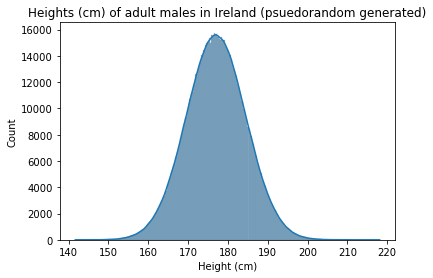

In [65]:
ax = sns.histplot(irish_male_heights, kde=True)
ax.set(xlabel='Height (cm)', ylabel='Count')
ax.set_title("Heights (cm) of adult males in Ireland (psuedorandom generated)");

The bell curve shape that we expected is present, but do we have 68% of the events within 1 standard deviation of the mean, and 95% within are with 2? I'll next highlight areas of the x axis to represent the standard deviations.

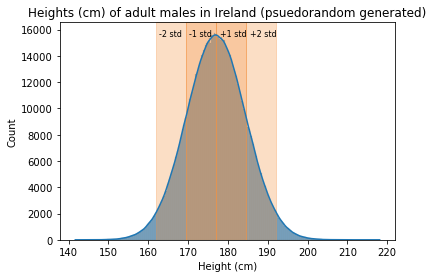

In [67]:
ax = sns.histplot(irish_male_heights, kde=True)
ax.set(xlabel='Height (cm)', ylabel='Count')
ax.set_title("Heights (cm) of adult males in Ireland (psuedorandom generated)")

# Highlighting the section between the mean, and the mean + 1 standard deviation
ax.axvspan(np.mean(irish_male_heights),(np.mean(irish_male_heights)+np.std(irish_male_heights)), color='#F49342', alpha =0.5)
ax.text(np.mean(irish_heights)+1,15500, "+1 std", color = 'black', ha='left',fontsize = 8)

# Highlighting the section between the mean, and the mean - 1 standard deviation
ax.axvspan(np.mean(irish_male_heights),(np.mean(irish_male_heights)-np.std(irish_male_heights)), color='#F49342', alpha =0.5)
ax.text(np.mean(irish_male_heights)-1,15500, "-1 std", color = 'black', ha='right', fontsize = 8)

# Highlighting the section between the mean, and the mean + 2 standard deviations
ax.axvspan(np.mean(irish_male_heights)+np.std(irish_male_heights),(np.mean(irish_male_heights)+(2*np.std(irish_male_heights))), color='#F49342', alpha =0.3)
ax.text(np.mean(irish_male_heights)+np.std(irish_male_heights)+1,15500, "+2 std", color = 'black', ha='left', fontsize = 8)

# Highlighting the section between the mean, and the mean - 2 standard deviations
ax.axvspan(np.mean(irish_male_heights)-np.std(irish_male_heights),(np.mean(irish_male_heights)-(2*np.std(irish_male_heights))), color='#F49342', alpha =0.3)
ax.text(np.mean(irish_male_heights)-np.std(irish_male_heights)-1,15500, "-2 std", color = 'black', ha='right', fontsize = 8);


We can now see that almost all of the events either side of the mean are within 2 standard deviations, as we'd expect in a Normal Distribution.

We've seen that in just 1 line of code, we were able to create a sample of height measurements for the entire adult male population of Ireland. Although it won't match the real world exactly, it still gives us a good idea of we can expect to encounter. In this example if I was designing something specifically for men, such as a menswear range or perhaps even the height of the doors for mens changing rooms, I would have a sizable sample to base my decisions on. 

#### Probability Density Function

### Uniform Distribution

The Uniform Probability Distribution is another that we see often in the real world, whereby each of the available options has an equal probability of being selected. An everyday example of this is when we roll a fair die as each of the 6 faces has a 1 in 6 chance of being rolled, with none receiving a bias. Another example is when we pick a card out of a deck. Picking a particular card out of a full shuffled deck has an equal 1 in 52 chance of being picked, or picking out a diamond card out of a deck has a 13 in 52 chance of being picked (also summarised as 1 in 4). 

It should be noted, that in smaller samples, it's possible that a particular result may appear more or less often than we expect, and so the probabilities may not look to be uniform. However, as the sample size increases, a truly uniform distribution will even out. 

#### The random.uniform function

We've already seen another Numpy.Random function that generates numbers based on a Uniform Distribution - the Integers function outlined in the Simple Random Data section of this report. One key difference between the Integers function and the Uniform function, is that while Integers generates integers (as you'd expect), Uniform will generate floating point numbers. Therefore if we are looking to create a discrete uniform distribution, such as simulating the rolling of a die, we'd want to use the Integers function. If the user wants to create a continuous Uniform Distribution, they can use the Uniform function.

Here we see the syntax is very similar, with just the "low", "high" and "size" parameters available[36]:

```
Generator.uniform(low=0.0, high=1.0, size=None)
```

We can see the difference between Integer and Uniform here:

In [16]:
rng = np.random.default_rng(33)

continuous = rng.uniform(1,7,10)
discrete = rng.integers(1,7,10)

print("Continuous:")
print(continuous)
print("\nDiscrete:")
print(discrete)

Continuous:
[3.66185342 4.41094715 6.44862265 2.52549732 4.53268762 3.15473992
 5.5382417  4.25835317 2.21250675 4.09663171]

Discrete:
[3 2 4 1 1 1 6 3 1 1]


#### Continuous example - measuring the time between breaths for healthy adults

For this example, I'm going to assume that the entire adult male population of Ireland are healthy with vital signs that indicate no underlying health issues. This is obviously would not be reflected in the real world, but can help show a continuous example of a uniform distribution.

According to the Cleveland Clinic, the normal respiration rate for an adult at rest is between 12 and 20 breaths per minute[37]. Therefore I will set 3 as the lower limit (60 seconds / 20 breaths) and 5 as the higher limit (60 seconds / 12 breaths), and will simulate measuring the time from one breath to the next across the Irish adult male population figure used previously.

In [19]:
rng = np.random.default_rng(33)

ireland_breath = rng.uniform(3, 5, irish_male_population)

ireland_breath

array([3.88728447, 4.13698238, 4.81620755, ..., 4.64279304, 4.76217182,
       4.48989452])

As before, we can double check the number of events generated, alongside the minimum and maximum values. In this case, as we specified a minimum of 3, and a maximum of 5, we'd expect these values to be as close as possible to them.

In [20]:
print("Number of male Irish adults measured:")
print(len(ireland_breath))
print("\nShortest time to breath measured:")
print(min(ireland_breath))
print("\nLongest time to breath measured:")
print(max(ireland_breath))

Number of male Irish adults measured:
1745643

Shortest time to breath measured:
3.000001233543774

Longest time to breath measured:
4.999998156659682


Because our range is between 3 and 5, and every measurement has an equal chance of being recorded, we would expect the mean and median to to sit around the middle of this range - in this case around 4.

In [28]:
print("The mean measurement is:")
print(np.mean(ireland_breath))
print("\nThe median measurement is:")
print(np.median(ireland_breath))

The mean measurement is:
3.9998228200314583

The median measurement is:
3.999759805633169


As each measurement has an equal probability of being measured, we should not see the bell curve shape that we saw on the Normal Distribution. In this case, we should be seeing a much flatter, more even distribution of the results.

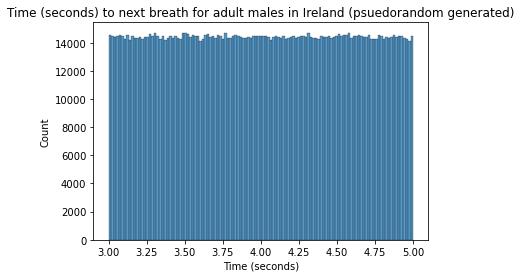

In [26]:
ax = sns.histplot(ireland_breath)
ax.set(xlabel='Time (seconds)', ylabel='Count')
ax.set_title("Time (seconds) to next breath for adult males in Ireland (psuedorandom generated)");

This plot matches up with what we'd expect for a Uniform Distribution. While some measurements occurred more often than others, the differences are minor, and so we can be confident that there was an equal probability for each measurement. In our discrete example, we'll see how smaller sample sizes can lead us astray.

#### Discrete example - rolling a fair 6 sided die

As rolling a die is an example of a discrete uniform probability, that is to say that each of the 6 values has an equal probability of being rolled and no decimal figures are possible, we will have to use the Integers function in this example. While it isn't the Uniform function being used here, they do both generate data for a Uniform distribution.

To begin with, let's roll a fair 6 sided die 30 times, and see how our results look.

In [29]:
rng = np.random.default_rng(33)

roll_30 = rng.integers(1, 7, 30)

roll_30

array([6, 3, 3, 4, 5, 6, 2, 2, 4, 4, 2, 3, 6, 5, 6, 4, 3, 2, 5, 4, 3, 2,
       4, 1, 1, 1, 6, 3, 1, 1])

Since each outcome has an equal probability, we would expect each number to be rolled 5 times (30 rolls / 6 outcomes). However, the number 5 was only rolled 3 times within this sample. I'll plot this so that we can see this clearer.

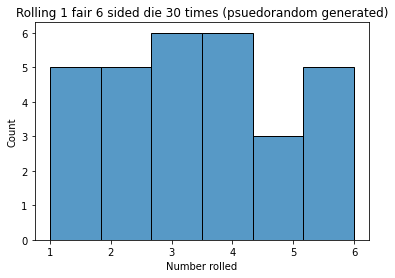

In [31]:
ax = sns.histplot(roll_30)
ax.set(xlabel='Number rolled', ylabel='Count')
ax.set_title("Rolling 1 fair 6 sided die 30 times (psuedorandom generated)");

Here we can see that numbers 3 and 4 we rolled 6 times each, however number 5 was only rolled 3 times. With such a small sample, one could be led into believe that there was some bias on the die to reduce the probability of 5 being rolled. However, probability is exactly what it says - its probability. With a sample of only 30 die rolls, it is possible that one number is rolled less than it's probability would suggest, or that another is rolled more. It's therefore risky to make any judgement based on such a small sample, and so in a situation like this, we should look to gather more data. For example, what happens if we ask every adult male in Ireland to roll a fair 6 sided die.

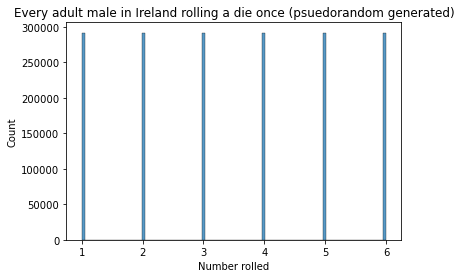

In [32]:
rng = np.random.default_rng(33)

roll_ireland = rng.integers(1, 7, irish_male_population)

ax = sns.histplot(roll_ireland)
ax.set(xlabel='Number rolled', ylabel='Count')
ax.set_title("Every adult male in Ireland rolling a die once (psuedorandom generated)");

With 1745643 adult males in Ireland, each rolling the die once, we'd expect each number to be rolled around 290,940 times, and that's roughly what we see here. Each of the 6 outcomes looks even to the human eye. If we take a look at the count for each of the outcomes, we'll see that they're not all exactly 290,940 (in fact none of them are), but they are all centered around that number.

In [34]:
number, count = np.unique(roll_ireland, return_counts=True)
count

array([291140, 290699, 291512, 290630, 290465, 291197])

### Bernoulli and Binomial Distributions

The Bernoulli probability distribution only tracks binary outcomes, with 1 incidicating a "success", and 0 a "failure". It can therefore be used for scenarios such as flipping a coin, where 1 could mean landing on heads, and 0 on tails. Other scenarios include tracking the sales conversion on an online store, where 1 incidates a completed sale, and 0 an abandoned checkout.

The Binomial distribution acts in much the same way, however whereas the bernoulli looks at the outcome of 1 event, the binomial distribution takes in multiple repeats of that event. For example, the outcome of flipping a coin once and recording 1 for heads or 0 for tails would be a bernoulli variable, whereas the outcome of flipping a coin 10 times summing the number of heads would be a binomial variable[38].

It should also be noted, that while this coin flipping example involves two outcomes with equal probability (0.5 for heads and 0.5 for tails), this does not have to be the case for these two distributions. For example, an online store could have a conversion rate of 1% or less, but still be considered a bernoulli or binomial distribution[28].

#### The random.binomial function

As these distributions only count the "successes" (1s in this case), the syntax for the function is very straightforward[39]:

```
Generator.binomial(n, p, size=None)
```

Here "n" is the number of actions in each trial. For example, if we're looking to flip a coin 10 times, we'd enter 10 here. It's also worthwhile noticing that Numpy.Random does not have a specific bernoulli function, as the user can just set "n=1" to create a bernoulli distribution via the binomial method.

"p" is the probability of success, that is to say the probability of the outcome being 1. In the coin flipping example, this would be 0.5. In my store conversion example it would be 0.01 (for a 1% probability).

As we've seen before, size is the amount of events we want in our dataset. We must be careful not to confuse this with "n" though. For example:
```
Generator.binomial(n = 10, p = 0.5, size=50)
```

This would simulate 50 people flipping a coin 10 times each. That is a total of 500 coin flips, not 50.

#### Bernoulli Example - How many sales can I anticipate from a given amount of traffic?

Operating a success online business rests on two key data points: 
* How much traffic are you getting? 
* And what proportion are you converting? 

There's clearly a lot that goes into determining these two data points, and a number of factors that can influence one or both, but the fact remains that you can't sell anything without traffic, an that traffic is useless if none covert into sales. You'll therefore find online businesses working tirelessly to improve their conversion rate through their pricing strategies, presentation or even streamlining the checkout process to reduce friction. They'll therefore be well aware of what percentage of visits are likely to create sales, and so can better judge how much they are willing to pay for traffic to their website via advertisements, product placements and such.

For this example, let's imagine I am running an online store that sells a wonderful line of men's socks. I've been tweaking my website endlessly, and I now have a conversion rate of about 5%, and my socks sell for €5 a pair. It's now time to start my marketing campaign. I've been offered the chance to guarantee every adult male in Ireland will visit my website just once for the reasonable price of €500,000. 

€500,000 for 1745643 potential customers - sounds pretty good, right? Let's use the bernoulli distribution to see.

In [10]:
#State our variables

conversion_rate = 0.05

socks_price = 5

#Now to generate the distribution
rng = np.random.default_rng(33)

socks_ireland = rng.binomial(1, conversion_rate, irish_male_population)

socks_ireland

array([0, 0, 0, ..., 0, 0, 0])

We can now plot the results, and see how it stacks up.

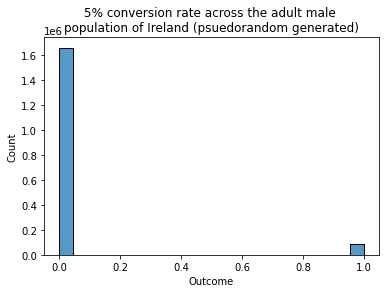

In [14]:
ax = sns.histplot(socks_ireland)
ax.set(xlabel='Outcome', ylabel='Count')
ax.set_title("5% conversion rate across the adult male \npopulation of Ireland (psuedorandom generated)");

Here we can see over 1.6 million visitors didn't convert, as shown by the 0s. That said, we expected the amount of sales to be a good bit lower, but did we convert enough to make profit on our €500,000?

In [17]:
cost = 500000

revenue = sum(socks_ireland) * socks_price

total = revenue-cost
print("The final total for this campaign is €" + str(total) + ".")

The final total for this campaign is €-65595.


Oh dear, If I took up this opportunity, I would lose €65595. It's a good thing I was able to simulate this scenario then.

From here I can tweak my variables, and perhaps find a price and conversion rate that would bring sufficient profit for my business. At that point I can go into my decision with more confidence, while being aware that these are just probabilities, and in the real world many things could change the results (for example my website going down with all this traffic).

#### Binomial example - Flip 10 heads to win a prize!

Now that we've seen how a bernoulli distribution can help someone budget their online advertising costs, we can now turn to the binomial distribution. In this example, I am going to challenge every adult male in Ireland to flip heads on a fair, balanced coin 20 times in a row. If they are successful, they will win a prize!

Flipping 20 heads in a row is incredibly unlikely, especially if you only have 1 attempt (you'd wish you had recorded it), but it's not impossible. Before I put my plan into practice, I can use a binomial distribution to give me an idea of how many winners I can expect.


In [18]:
#State our variables

heads = 0.5

coin_flips = 20

#Now to generate the distribution
rng = np.random.default_rng(33)

flips_ireland = rng.binomial(coin_flips, heads, irish_male_population)

flips_ireland

array([10, 10, 13, ..., 12, 13, 11])

Again, let's visualise the results.

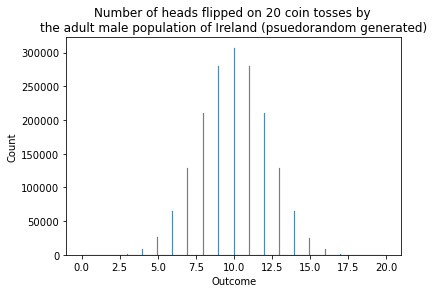

In [19]:
ax = sns.histplot(flips_ireland)
ax.set(xlabel='Outcome', ylabel='Count')
ax.set_title("Number of heads flipped on 20 coin tosses by \nthe adult male population of Ireland (psuedorandom generated)");

Interestingly, we've created the bell curve shape that we'd expect of a normal distribution, as the results center around the midpoint of 10. This isn't surprising as the coins were flipped 20 times, and the probability of landing on heads was 0.5.

The real question for our competition though, is did anyone get 20 heads in a row? We'll have to print the frequency of each result to know for sure.

In [23]:
result, count = np.unique(flips_ireland, return_counts=True)
print(number)
print(count)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[     1     41    299   1928   8102  25998  64439 128623 209892 279954
 307226 279492 210610 128820  64505  25401   8049   1905    326     31
      1]


With every adult male in Ireland flipping a coin 20 times, we've ended up with 1 lucky guy getting 20 heads in a row. I really hope he recorded that.

We also had one unfortunate soul get 20 tails in a row. Today was not their day.

### Poisson Distribution

Events are independent of each other. Average time between events is known, but the exact timing is random.

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.poisson.html#numpy.random.poisson
https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459

Examples - tickets received, cars driving past

In [36]:
#numpy.random.poisson(lam, size)

# Example 1 - tickets received
# My team gets around 1000 tickets per week, which would mean a ticket every 5.9 mins on average

tickets = np.random.poisson(lam=5.9, size = 1000)

plt.hist(tickets)


NameError: name 'plt' is not defined

### Exponential Distribution

Fewer large values, but more smaller values

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.exponential.html#numpy.random.exponential
https://courses.lumenlearning.com/introstats1/chapter/the-exponential-distribution/

examples - chat handle times, how long products last (e.g. how long until Keela loses a hair band)

### Geometric Distribution

The number of attempts until success. e.g. the number of times a die was rolled until you got a 6.

https://minisham.redbrick.dcu.ie/CA/Notes/CA266/10_Geometric_Distribution.pdf
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.geometric.html#numpy.random.geometric

examples - number of tickets solved until a csat was completed, videogame loot boxes

# Notes

# Seeding random numbers

Computers are deterministic, not random. therefore if we seed a specific starting point, we can take advantage of this. Quote from MIT article “if you ask the same question you’ll get the same answer every time.”

https://www.random.org/randomness/
https://engineering.mit.edu/engage/ask-an-engineer/can-a-computer-generate-a-truly-random-number/

Using a seed makes the code repeatable. Good for testing, sharing and teaching. Sharpsight article (https://www.sharpsightlabs.com/blog/numpy-random-seed/) mentions using for teaching. 

“When I do this, it’s important that people who read the tutorials and run the code get the same result. If a student reads the tutorial, and copy-and-pastes the code exactly, I want them to get the exact same result. This just helps them check their work! If they type in the code exactly as I show it in a tutorial, getting the exact same result gives them confidence that they ran the code properly.” 

“If you use a function from the numpy.random namespace (like np.random.randint, np.random.normal, etc) without using NumPy random see first, Python will actually still use numpy.random.seed in the background. NumPy will generate a seed value from a part of your computer system (like /urandom on a Unix or Linux machine).”



### What improvements come with PCG64?
How to seed PCG64?
numpy.random.default_rng(). Can also specify the old Mersenne Twiser algorithm by passinng MT19937 in the argument, e.g. numpy.random.default_rng(MT19937(42)
"Generator, besides being NumPy-aware, has the advantage that it provides a much larger number of probability distributions to choose from."
from - https://numpy.org/doc/stable/reference/random/generator.html

from https://numpy.org/doc/stable/reference/random/index.html
" PCG64 which has better statistical properties than the legacy MT19937"

How the seed is picked (MT algorithm)
https://numpy.org/doc/stable/reference/random/legacy.html
"If seed is None, then the MT19937 BitGenerator is initialized by reading data from /dev/urandom (or the Windows analogue) if available or seed from the clock otherwise."

More info on seeding - https://numpy.org/doc/stable/reference/random/parallel.html#seedsequence-spawn

"For example, MT19937 has a state consisting of 624 uint32 integers. A naive way to take a 32-bit integer seed would be to just set the last element of the state to the 32-bit seed and leave the rest 0s. This is a valid state for MT19937, but not a good one. The Mersenne Twister algorithm suffers if there are too many 0s. Similarly, two adjacent 32-bit integer seeds (i.e. 12345 and 12346) would produce very similar streams."

SeedSequence avoids these problems by using successions of integer hashes with good avalanche properties to ensure that flipping any bit in the input input has about a 50% chance of flipping any bit in the output. Two input seeds that are very close to each other will produce initial states that are very far from each other (with very high probability). It is also constructed in such a way that you can provide arbitrary-sized integers or lists of integers. SeedSequence will take all of the bits that you provide and mix them together to produce however many bits the consuming BitGenerator needs to initialize itself.

These properties together mean that we can safely mix together the usual user-provided seed with simple incrementing counters to get BitGenerator states that are (to very high probability) independent of each other. We can wrap this together into an API that is easy to use and difficult to misuse.

avalanche effect - https://en.wikipedia.org/wiki/Avalanche_effect

https://numpy.org/doc/stable/reference/random/performance.html

"The recommended generator for general use is PCG64. It is statistically high quality, full-featured, and fast on most platforms, but somewhat slow when compiled for 32-bit processes."

"MT19937 fails some statistical tests (https://www.iro.umontreal.ca/~lecuyer/myftp/papers/testu01.pdf) and is not especially fast compared to modern PRNGs. For these reasons, we mostly do not recommend using it on its own, only through the legacy RandomState for reproducing old results. That said, it has a very long history as a default in many systems."

" The original MT19937 generator is much slower since it requires 2 32-bit values to equal the output of the faster generators."

![here](https://screenshot.click/09_51-97cot-1j3zc.jpg)

https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#numpy.random.PCG64



Simple random data vs permutations

Permutations only change the order of the elements in an array, whether that be by changing it in place (shuffle) or creating a copy of the original array (permutation). The number of elements in the array, and how frequently each appears in the array are not impacted at all. 

Meanwhile the simple random data functions will create new arrays of randomly selected data. For most of these, it involves selecting numbers from a given range (e.g. floating point numbers between 0 and 1). In the case of random.choice() it will randomly pick x elements out of an existing array with or without replacement. Therefore simple random data creates a new data set (potentially based off an existing one in the case of Choice), whereas permutations just alter an existing data set.



References 

<p>[1] Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). https://doi.org/10.1038/s41586-020-2649-2</p>
<p>[2] Pandas; Package Overview; https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html</p>
<p>[3] Stack Overflow; Differences between numpy.random and random.random in Python; https://stackoverflow.com/a/43838531</p>
<p>[4] Numpy; numpy.random.Generator.choice;
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice</p>
<p>[5] Numpy; numpy.random.Generator.shuffle; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle</p>
<p>[6] Numpy; numpy.random.Generator.permutation; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation</p>
<p>[7] Statistics by Jim; Introduction to Bootstrapping in Statistics with an Example; https://statisticsbyjim.com/hypothesis-testing/bootstrapping/</p>
<p>[8] Numpy; Random sampling (numpy.random); https://numpy.org/doc/stable/reference/random/index.html</p>
<p>[9] Numpy; Permuted Congruential Generator (64-bit, PCG64); https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#numpy.random.PCG64</p>
<p>[10] MIT School of Engineering: Ask an Engineer; Can a computer generate a truly random number?; https://engineering.mit.edu/engage/ask-an-engineer/can-a-computer-generate-a-truly-random-number/</p>
<p>[11] Pierre L’Ecuyer, Richard Simard, TestU01: A C Library for Empirical Testing of
Random Number Generators, ACM Transactions on Mathematical Software, Vol. 33, No. 4, Article 22, August 2007. https://www.iro.umontreal.ca/~lecuyer/myftp/papers/testu01.pdf</p>
<p>[12] Melissa E. O’Neill, PCG: A Family of Simple Fast Space-Efficient Statistically Good Algorithms for Random Number Generation, September 5, 2014, https://www.cs.hmc.edu/tr/hmc-cs-2014-0905.pdf</p>
<p>[13] Numpy; Bit Generators; https://numpy.org/doc/stable/reference/random/bit_generators/index.html#seeding-and-entropy</p>
<p>[14] HACKADAY; WHAT IS ENTROPY AND HOW DO I GET MORE OF IT?; https://hackaday.com/2017/11/02/what-is-entropy-and-how-do-i-get-more-of-it/</p>
<p>[15] Sharp Sight Labs; NUMPY RANDOM SEED EXPLAINED; https://www.sharpsightlabs.com/blog/numpy-random-seed/</p>
<p>[16] Numpy; Parallel Random Number Generation; https://numpy.org/doc/stable/reference/random/parallel.html#seedsequence-spawn</p>
<p>[17] Scipy; numpy.random.seed; https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html</p>
<p>[18] Numpy; Random Generator; https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng</p>
<p>[19] Numpy; numpy.random.Generator.integers; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers</p>
<p>[20] Numpy; numpy.random.Generator.random; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random</p>
<p>[21] Numpy; numpy.random.Generator.bytes; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes</p>
<p>[22] Numpy; numpy.random.Generator.choice; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice</p>
<p>[23] Numpy; numpy.random.Generator.permutation; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation</p>
<p>[24] Numpy; numpy.random.Generator.shuffle; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle</p>
<p>[25] Pier Paolo Ippolito; Towards Data Science; Probability Distributions in Data Science; Aug 22 2019;  https://towardsdatascience.com/probability-distributions-in-data-science-cce6e64873a7</p>
<p> [26] Wikipedia; Carl Friedrich Gauss; https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss</p>
<p> [27] Stat Trek; Probability Distributions: Discrete vs. Continuous
; https://stattrek.com/probability-distributions/discrete-continuous.aspx</p>
<p> [28] Peter Bruce, Andrew Bruce, Peter Gedeck; Practical Statistics for Data Scientists, 2nd Edition; O'Reilly Media, Inc.; May 2020</p>
<p> [29] Select Statistical Services; Regression to the Mean: as relevant today as it was in the 1900s
; https://select-statistics.co.uk/blog/regression-to-the-mean-as-relevant-today-as-it-was-in-the-1900s/</p>
<p> [30] https://www.citizensinformation.ie/en/birth_family_relationships/children_s_rights_and_policy/children_and_rights_in_ireland.html#:~:text=However%2C%20you%20must%20be%2018%20years%20of%20age%20or%20over </p>
<p> [31] https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp </p>
<p> [32] https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20Summary%20Report%20March%202011.pdf </p>
<p> [33] https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html </p>
<p> [34] https://ourworldindata.org/human-height </p>
<p> [35] https://seaborn.pydata.org/generated/seaborn.histplot.html </p>
<p> [36] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform </p>
<p> [37] https://my.clevelandclinic.org/health/articles/10881-vital-signs </p>
<p> [38] https://towardsdatascience.com/understanding-bernoulli-and-binomial-distributions-a1eef4e0da8f </p>
<p> [39] https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html </p>



https://zkf85.github.io/2019/01/31/np-shuffle-vs-permutation
https://www.w3schools.com/python/numpy_random_permutation.asp
https://www.random.org/randomness/
https://www.sharpsightlabs.com/blog/numpy-random-seed/
 https://numpy.org/doc/stable/reference/random/index.html https://numpy.org/doc/stable/reference/random/new-or-different.html#new-or-different https://www.sharpsightlabs.com/blog/numpy-random-seed/ https://medium.com/@debanjana.bhattacharyya9818/numpy-random-seed-101-explained-2e96ee3fd90b
 https://iopscience.iop.org/article/10.3847/1538-4357/aaf103 
 https://towardsdatascience.com/probability-concepts-explained-probability-distributions-introduction-part-3-4a5db81858dc